### Sensitivity Analysis

See how CapEx changes when a specific parameter varies

In [24]:
import os
import pandas as pd
from ORBIT import ProjectManager, load_config

weather = pd.read_csv("data/example_weather.csv", parse_dates=["datetime"])\
            .set_index("datetime")

print(fixed_config)

{'site': {'depth': 22.5, 'distance': 124, 'distance_to_landfall': 35, 'mean_windspeed': 9}, 'plant': {'layout': 'grid', 'num_turbines': 50, 'row_spacing': 7, 'substation_distance': 1, 'turbine_spacing': 7}, 'landfall': {'interconnection_distance': 3, 'trench_length': 2}, 'turbine': 'SWT_6MW_154m_110m', 'array_cable_install_vessel': 'example_cable_lay_vessel', 'export_cable_install_vessel': 'example_cable_lay_vessel', 'export_cable_bury_vessel': 'example_cable_lay_vessel', 'oss_install_vessel': 'example_heavy_lift_vessel', 'spi_vessel': 'example_scour_protection_vessel', 'wtiv': 'example_wtiv', 'OffshoreSubstationInstallation': {'feeder': 'example_heavy_feeder', 'num_feeders': 1}, 'array_system_design': {'cables': ['XLPE_630mm_33kV', 'XLPE_400mm_33kV']}, 'export_system_design': {'cables': 'XLPE_500mm_132kV', 'percent_added_length': 0.0}, 'scour_protection_design': {'cost_per_tonne': 40, 'scour_protection_depth': 1}, 'design_phases': ['MonopileDesign', 'ScourProtectionDesign', 'ArraySyst

In [18]:
fixed_config = load_config("configs/example_fixed_project.yaml") 

CapEx_1 = []
turbines = []
_from = 20
to = 50

for i in range(_from, to + 1):
    fixed_config['plant']['num_turbines'] = i
    
    project = ProjectManager(fixed_config, weather=weather)
    project.run()
    CapEx_1.append(project.total_capex / (project.config["plant"]["capacity"] * 1000))
    turbines.append(i)
    

### CapEx vs. number of turbines

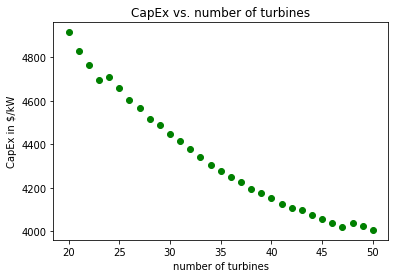

In [23]:
import matplotlib.pyplot as plt
plt.scatter(turbines, CapEx_1, color='green')
plt.xlabel('number of turbines') 
plt.ylabel('CapEx in $/kW') 
plt.title("CapEx vs. number of turbines")
plt.show()

In [27]:
fixed_config = load_config("configs/example_floating_project.yaml") 

CapEx_2 = []
depth = []
_from = 20
to = 50

for i in range(_from, to + 1):
    fixed_config['site']['depth'] = i
    
    project = ProjectManager(fixed_config, weather=weather)
    project.run()
    CapEx_2.append(project.total_capex / (project.config["plant"]["capacity"] * 1000))
    depth.append(i)
    

### CapEx vs. depth

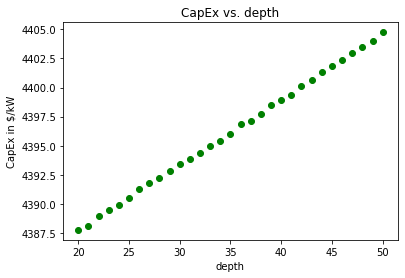

In [30]:
import matplotlib.pyplot as plt
plt.scatter(depth, CapEx_2, color='green')
plt.xlabel('depth') 
plt.ylabel('CapEx in $/kW') 
plt.title("CapEx vs. depth")
plt.show()

In [40]:
fixed_config = load_config("configs/example_floating_project.yaml") 

CapEx_3 = []
spacing = []
_from = 1
to = 14

for i in range(_from, to + 1):
    fixed_config['site']['row_spacing'] = i
    fixed_config['site']['turbine_spacing'] = i
    
    
    project = ProjectManager(fixed_config, weather=weather)
    project.run()
    CapEx_3.append(project.total_capex / (project.config["plant"]["capacity"] * 1000))
    spacing.append(i)

### CapEx vs. spacing

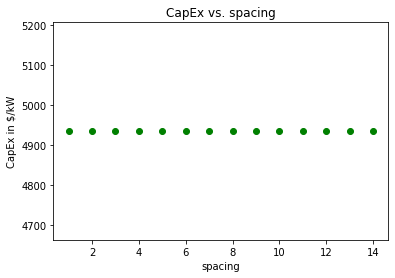

In [41]:
import matplotlib.pyplot as plt
plt.scatter(spacing, CapEx_3, color='green')
plt.xlabel('spacing') 
plt.ylabel('CapEx in $/kW') 
plt.title("CapEx vs. spacing")
plt.show()

In [45]:
fixed_config = load_config("configs/example_fixed_project.yaml") 

CapEx_4 = []
distance = []
_from = 20
to = 40

for i in range(_from, to + 1):
    fixed_config['site']['distance'] = i
    fixed_config['site']['distance_to_landfall'] = i
    
    
    project = ProjectManager(fixed_config, weather=weather)
    project.run()
    CapEx_4.append(project.total_capex / (project.config["plant"]["capacity"] * 1000))
    distance.append(i)

### CapEx vs. distance

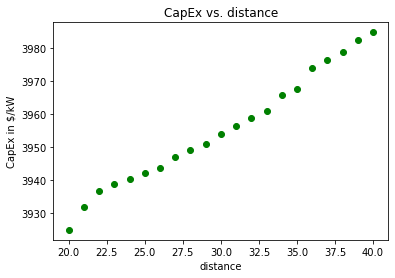

In [46]:
import matplotlib.pyplot as plt
plt.scatter(distance, CapEx_4, color='green')
plt.xlabel('distance') 
plt.ylabel('CapEx in $/kW') 
plt.title("CapEx vs. distance")
plt.show()